# Performance comparisons

In [4]:
import pandas as pd
import numpy as np
import pickle
from datetime import datetime

In [5]:
from weighted_concordance import *
from score_functions import wibs

In [6]:
# # importing module
# import sys

# # appending a path
# sys.path.append('C:/Users/thseale/Documents/Python Packages')

# from lifelines import CoxPHFitter
# from lifelines.utils import datetimes_to_durations, concordance_index

In [7]:
from lifelines import CoxPHFitter
from lifelines.utils import datetimes_to_durations, concordance_index
from sksurv.ensemble import RandomSurvivalForest

## Loading models

In [8]:
unweighted_cox_pca = pickle.load(open('unweighted_cox_pca_wc.pkl', 'rb'))

In [9]:
unweighted_cox = pickle.load(open('unweighted_cox_wc.pkl', 'rb'))

In [10]:
barlow_cox_pca = pickle.load(open("barlow_cox_pca_wc.pkl", "rb"))

In [11]:
barlow_cox = pickle.load(open("barlow_cox_wc.pkl", "rb"))

In [12]:
prentice_cox_pca = pickle.load(open("prentice_cox_pca_wc.pkl", "rb"))

In [13]:
prentice_cox = pickle.load(open("prentice_cox_wc.pkl", "rb"))

In [14]:
selfprentice_cox_pca = pickle.load(open("selfprentice_cox_pca_wc.pkl", "rb"))

In [15]:
selfprentice_cox = pickle.load(open("selfprentice_cox_wc.pkl", "rb"))

In [16]:
adjusted_cox_pca = pickle.load(open("adjusted_cox_pca_wc.pkl", "rb"))

In [17]:
adjusted_cox = pickle.load(open("adjusted_cox_wc.pkl", "rb"))

In [18]:
unweighted_cox_penalised = pickle.load(open("unweighted_cox_penalised_wc.pkl", "rb"))

In [19]:
penalised_barlow_cox = pickle.load(open("penalised_barlow_cox_wc.pkl", "rb"))

In [20]:
penalised_prentice_cox = pickle.load(open("penalised_prentice_cox_wc.pkl", "rb"))

In [21]:
penalised_selfprentice_cox = pickle.load(open("penalized_selfprentice_cox_wc.pkl", "rb"))

In [22]:
penalised_adjusted_cox = pickle.load(open("penalised_adjusted_cox_wc.pkl", "rb"))

In [23]:
unweighted_rsf = pickle.load(open("unweighted_rsf.pkl", "rb"))

## Loading data

### Test data 

In [24]:
X_tr_test = pd.read_csv("D:/compiled_data/X_tr_test.csv").set_index("csid")

y_test = pd.read_csv("D:/compiled_data/y_test.csv").set_index("csid")

In [25]:
len(y_test)

213

In [26]:
def date_time_conversion(date):
    return(datetime.strptime(date,"%Y-%m-%dT%H:%M:%SZ"))

# Coverting the times into datetime format
y_tr_test = y_test.assign(
    event = y_test.ep_CKB0020_combined_ep,
    start_time = y_test.study_date.map(date_time_conversion),
    event_time = y_test.ep_CKB0020_combined_datedeveloped.map(date_time_conversion)
).drop(columns = y_test.columns)
y_tr_test["duration"] = datetimes_to_durations(y_tr_test["start_time"],y_tr_test["event_time"])[0]
y_tr_test["subcohort"] = y_test["subcohort"]
y_tr_test = y_tr_test.drop(columns = ["start_time","event_time"])
y_tr_test

,event,duration,subcohort
csid,,,
2022-00229-3793895,1,3100.0,False
2022-00229-2146926,1,1229.0,False
2022-00229-5726795,1,1415.0,False
2022-00229-2081726,1,1548.0,False
2022-00229-1019474,1,277.0,False
...,...,...,...
2022-00229-4639290,0,4140.0,True
2022-00229-3940363,0,4407.0,True
2022-00229-1634360,0,4866.0,True


### Training
For estimating censoring distributino for integrated brier score.

In [27]:
y_train = pd.read_csv("D:/compiled_data/y.csv").set_index("csid")

In [28]:
# Coverting the times into datetime format
y_tr_train = y_train.assign(
    event = y_train.ep_CKB0020_combined_ep,
    start_time = y_train.study_date.map(date_time_conversion),
    event_time = y_train.ep_CKB0020_combined_datedeveloped.map(date_time_conversion)
).drop(columns = y_train.columns)
y_tr_train["duration"] = datetimes_to_durations(y_tr_train["start_time"],y_tr_train["event_time"])[0]
y_tr_train["subcohort"] = y_train["subcohort"]
y_tr_train = y_tr_train.drop(columns = ["start_time","event_time"])
y_tr_train

,event,duration,subcohort
csid,,,
2022-00229-1799093,1,1192.0,False
2022-00229-4744170,1,1690.0,False
2022-00229-1082517,1,2035.0,False
2022-00229-3397875,1,2530.0,False
2022-00229-4372175,1,2216.0,False
...,...,...,...
2022-00229-5565114,0,4495.0,True
2022-00229-4902412,0,3448.0,True
2022-00229-4823882,0,895.0,True


## Predictions

In [29]:
event_times = y_tr_test["duration"]
event_observed = y_tr_test["event"]

### Unweighted Cox PH

In [30]:
unweighted_cox_test_preds = unweighted_cox.predict_partial_hazard(unweighted_cox_pca.transform(X_tr_test))

### Cox PH, Barlow Weights

In [31]:
barlow_cox_test_preds = barlow_cox.predict_partial_hazard(barlow_cox_pca.transform(X_tr_test))

### Cox PH, Prentice Weights

In [32]:
prentice_cox_test_preds = prentice_cox.predict_partial_hazard(prentice_cox_pca.transform(X_tr_test))

### Cox PH, Self-Prentice Weights

In [33]:
selfprentice_cox_test_preds = selfprentice_cox.predict_partial_hazard(selfprentice_cox_pca.transform(X_tr_test))

### Cox PH, Adjusted Weights

In [34]:
adjusted_cox_test_preds = adjusted_cox.predict_partial_hazard(adjusted_cox_pca.transform(X_tr_test))

### Penalised unweighted Cox PH

In [35]:
unweighted_cox_penalised_test_preds = unweighted_cox_penalised.predict_partial_hazard(X_tr_test)

### Penalised Cox PH, Barlow Weights

In [36]:
penalised_barlow_cox_test_preds = penalised_barlow_cox.predict_partial_hazard(X_tr_test)

### Penalised Cox PH, Prentice Weights

In [37]:
penalised_prentice_cox_test_preds = penalised_prentice_cox.predict_partial_hazard(X_tr_test)

### Penalised Cox PH, Prentice Weights

In [38]:
penalised_selfprentice_cox_test_preds = penalised_selfprentice_cox.predict_partial_hazard(X_tr_test)

### Penalised Cox PH, Adjusted Weights

In [39]:
penalised_adjusted_cox_test_preds = penalised_adjusted_cox.predict_partial_hazard(X_tr_test)

# Random Survival Forest, unweighted

In [40]:
unweighted_rsf_test_preds = unweighted_rsf.predict(X_tr_test)

## Results

In [41]:
sample_fraction = len(y_tr_test)/(512724-1200)
sample_fraction

0.00041640274943111175

In [51]:
model_results = pd.DataFrame({
    "model": ["Unweighted Cox PH, PCA",
             "Cox PH, Barlow Weights, PCA",
             "Cox PH, Prentice Weights, PCA",
             "Cox PH, Self-Prentice Weights, PCA",
             "Cox PH, Adjusted Weights, PCA",
             "Penalized unweighted Cox PH",
             "Penalized Cox PH, Barlow Weights",
             "Penalized Cox PH, Prentice Weights",
             "Penalized Cox PH, Self-Prentice Weights",
             "Penalized Cox PH, Adjusted Weights",
             "Unweighted Random Survival Forest"],
    "weighted_concordance": [weighted_concordance(event_times,unweighted_cox_test_preds, event_observed,sample_fraction),
                            weighted_concordance(event_times,barlow_cox_test_preds, event_observed,sample_fraction),
                             weighted_concordance(event_times,prentice_cox_test_preds, event_observed,sample_fraction),
                             weighted_concordance(event_times,selfprentice_cox_test_preds, event_observed,sample_fraction),
                             weighted_concordance(event_times,adjusted_cox_test_preds, event_observed,sample_fraction),
                             weighted_concordance(event_times,unweighted_cox_penalised_test_preds, event_observed,sample_fraction),
                             weighted_concordance(event_times,penalised_barlow_cox_test_preds, event_observed,sample_fraction),
                             weighted_concordance(event_times,penalised_prentice_cox_test_preds, event_observed,sample_fraction),
                             weighted_concordance(event_times,penalised_selfprentice_cox_test_preds, event_observed,sample_fraction),
                             weighted_concordance(event_times,penalised_adjusted_cox_test_preds, event_observed,sample_fraction),
                             weighted_concordance(event_times,unweighted_rsf_test_preds, event_observed,sample_fraction)],
    "concordance": [concordance_index(event_times,-unweighted_cox_test_preds, event_observed),
                            concordance_index(event_times,-barlow_cox_test_preds, event_observed),
                             concordance_index(event_times,-prentice_cox_test_preds, event_observed),
                             concordance_index(event_times,-selfprentice_cox_test_preds, event_observed),
                             concordance_index(event_times,-adjusted_cox_test_preds, event_observed),
                             concordance_index(event_times,-unweighted_cox_penalised_test_preds, event_observed),
                             concordance_index(event_times,-penalised_barlow_cox_test_preds, event_observed),
                             concordance_index(event_times,-penalised_prentice_cox_test_preds, event_observed),
                             concordance_index(event_times,-penalised_selfprentice_cox_test_preds, event_observed),
                             concordance_index(event_times,-penalised_adjusted_cox_test_preds, event_observed),
                            concordance_index(event_times,-unweighted_rsf_test_preds, event_observed)],
    "weighted_integrated_brier_scores": [wibs(unweighted_cox, unweighted_cox_pca.transform(X_tr_test), y_tr_test, y_tr_train, 1/sample_fraction)/(1+ 100*1/sample_fraction),
                                         wibs(barlow_cox, barlow_cox_pca.transform(X_tr_test), y_tr_test, y_tr_train, 1/sample_fraction)/(100 + 100*1/sample_fraction),
                                         wibs(prentice_cox, prentice_cox_pca.transform(X_tr_test), y_tr_test, y_tr_train, 1/sample_fraction)/(100 + 100*1/sample_fraction),
                                         wibs(selfprentice_cox, selfprentice_cox_pca.transform(X_tr_test), y_tr_test, y_tr_train, 1/sample_fraction)/(100 + 100*1/sample_fraction),
                                         wibs(adjusted_cox, adjusted_cox_pca.transform(X_tr_test), y_tr_test, y_tr_train, 1/sample_fraction)/(100 + 100*1/sample_fraction),
                                         wibs(unweighted_cox_penalised, X_tr_test, y_tr_test, y_tr_train, 1/sample_fraction)/(100 + 100*1/sample_fraction),
                                         wibs(penalised_barlow_cox, X_tr_test, y_tr_test, y_tr_train, 1/sample_fraction)/(100 + 100*1/sample_fraction),
                                         wibs(penalised_prentice_cox, X_tr_test, y_tr_test, y_tr_train, 1/sample_fraction)/(100 + 100*1/sample_fraction),
                                         wibs(penalised_selfprentice_cox, X_tr_test, y_tr_test, y_tr_train, 1/sample_fraction)/(100 + 100*1/sample_fraction),
                                         wibs(penalised_adjusted_cox, X_tr_test, y_tr_test, y_tr_train, 1/sample_fraction)/(100 + 100*1/sample_fraction),
                                         wibs(unweighted_rsf, X_tr_test, y_tr_test, y_tr_train, 1/sample_fraction, False)/(100 + 100*1/sample_fraction)],
    "integrated_brier_scores": [wibs(unweighted_cox, unweighted_cox_pca.transform(X_tr_test), y_tr_test, y_tr_train, 1),
                                         wibs(barlow_cox, barlow_cox_pca.transform(X_tr_test), y_tr_test, y_tr_train, 1),
                                         wibs(prentice_cox, prentice_cox_pca.transform(X_tr_test), y_tr_test, y_tr_train, 1),
                                         wibs(selfprentice_cox, selfprentice_cox_pca.transform(X_tr_test), y_tr_test, y_tr_train, 1),
                                         wibs(adjusted_cox, adjusted_cox_pca.transform(X_tr_test), y_tr_test, y_tr_train, 1),
                                         wibs(unweighted_cox_penalised, X_tr_test, y_tr_test, y_tr_train, 1),
                                         wibs(penalised_barlow_cox, X_tr_test, y_tr_test, y_tr_train, 1),
                                         wibs(penalised_prentice_cox, X_tr_test, y_tr_test, y_tr_train, 1),
                                         wibs(penalised_selfprentice_cox, X_tr_test, y_tr_test, y_tr_train, 1),
                                         wibs(penalised_adjusted_cox, X_tr_test, y_tr_test, y_tr_train, 1),
                                        wibs(unweighted_rsf, X_tr_test, y_tr_test, y_tr_train, 1, False)],
    
})
model_results

,model,weighted_concordance,concordance,weighted_integrated_brier_scores,integrated_brier_scores
0,"Unweighted Cox PH, PCA",0.710541,0.658544,0.000617,0.154842
1,"Cox PH, Barlow Weights, PCA",0.671967,0.616854,0.000001,0.305061
2,"Cox PH, Prentice Weights, PCA",0.704533,0.659369,0.000528,0.163855
3,"Cox PH, Self-Prentice Weights, PCA",0.644608,0.622375,0.000003,0.294786
4,"Cox PH, Adjusted Weights, PCA",0.682983,0.641157,0.000424,0.168252
5,Penalized unweighted Cox PH,0.698799,0.655879,0.005215,0.524371
6,"Penalized Cox PH, Barlow Weights",0.725155,0.671553,0.000001,0.305979
7,"Penalized Cox PH, Prentice Weights",0.724692,0.671299,0.000885,0.158433
8,"Penalized Cox PH, Self-Prentice Weights",0.512993,0.507456,0.000001,0.303846
9,"Penalized Cox PH, Adjusted Weights",0.724785,0.671299,0.000974,0.161597


In [54]:
model_results["weighted_integrated_brier_scores"] = model_results["weighted_integrated_brier_scores"]*100

In [55]:
model_results.columns = ["Weighted Concordance", "Concordance", "Weighted IBS", "IBS"]

model_results

,Weighted Concordance,Concordance,Weighted IBS,IBS
model,,,,
"Unweighted Cox PH, PCA",0.710541,0.658544,0.061710,0.154842
"Cox PH, Barlow Weights, PCA",0.671967,0.616854,0.000128,0.305061
"Cox PH, Prentice Weights, PCA",0.704533,0.659369,0.052842,0.163855
"Cox PH, Self-Prentice Weights, PCA",0.644608,0.622375,0.000314,0.294786
"Cox PH, Adjusted Weights, PCA",0.682983,0.641157,0.042376,0.168252
Penalized unweighted Cox PH,0.698799,0.655879,0.521457,0.524371
"Penalized Cox PH, Barlow Weights",0.725155,0.671553,0.000127,0.305979
"Penalized Cox PH, Prentice Weights",0.724692,0.671299,0.088469,0.158433
"Penalized Cox PH, Self-Prentice Weights",0.512993,0.507456,0.000132,0.303846


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
model_results_figure = model_results.melt(ignore_index = False).reset_index()
model_results_figure.columns = ["Model", "Scorer", "Score"]
model_results_figure

,Model,Scorer,Score
0,"Unweighted Cox PH, PCA",Weighted Concordance,0.710541
1,"Cox PH, Barlow Weights, PCA",Weighted Concordance,0.671967
2,"Cox PH, Prentice Weights, PCA",Weighted Concordance,0.704533
3,"Cox PH, Self-Prentice Weights, PCA",Weighted Concordance,0.644608
4,"Cox PH, Adjusted Weights, PCA",Weighted Concordance,0.682983
5,Penalized unweighted Cox PH,Weighted Concordance,0.698799
6,"Penalized Cox PH, Barlow Weights",Weighted Concordance,0.725155
7,"Penalized Cox PH, Prentice Weights",Weighted Concordance,0.724692
8,"Penalized Cox PH, Self-Prentice Weights",Weighted Concordance,0.512993
9,"Penalized Cox PH, Adjusted Weights",Weighted Concordance,0.724785


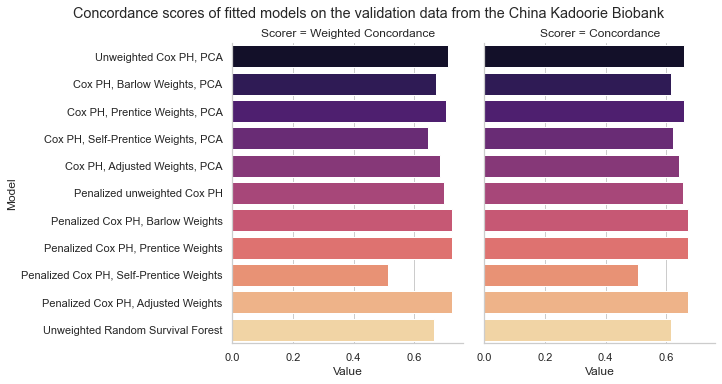

In [113]:
sns.set(rc = {'figure.figsize':(10.5,7)})
sns.set_theme(style = "whitegrid")
ax = sns.catplot(y = "Model", x = "Score", col = "Scorer" ,data = model_results_figure.query('Scorer.str.contains("Concordance")',engine="python"), kind = "bar", palette = "magma", orient = "h")
ax.set_axis_labels("Value","Model")
plt.suptitle("Concordance scores of fitted models on the validation data from the China Kadoorie Biobank", y = 1.025)
plt.savefig("../Project_file/diagrams/concordance_score_comparison.pdf", bbox_inches = "tight")

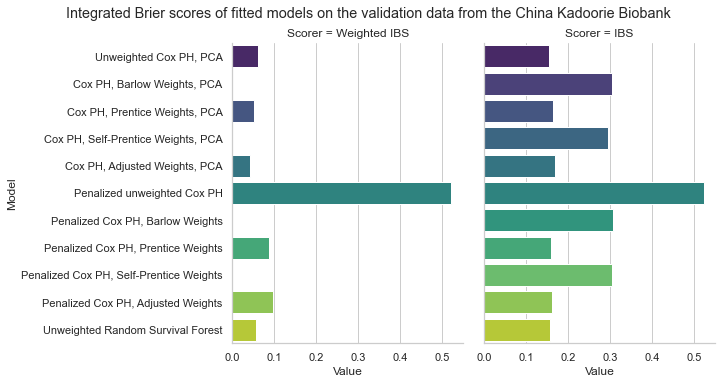

In [112]:
sns.set(rc = {'figure.figsize':(10.5,7)})
sns.set_theme(style = "whitegrid")
ax = sns.catplot(y = "Model", x = "Score", col = "Scorer" ,data = model_results_figure.query('Scorer.str.contains("IBS")',engine="python"), kind = "bar", palette = "viridis", orient = "h")
ax.set_axis_labels("Value","Model")
plt.suptitle("Integrated Brier scores of fitted models on the validation data from the China Kadoorie Biobank", y = 1.025)
plt.savefig("../Project_file/diagrams/concordance_score_comparison.pdf", bbox_inches = "tight")

In [49]:
with open('../Project_file/tables/model_fits.tex', 'w') as tf:
     tf.write(model_results.to_latex(float_format="%.4f", bold_rows = True,multicolumn_format = "c",
                                                  caption = "(Weighted) concordance and integrated Brier scores on the validation data from the China Kadoorie Biobank."))